In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
from datetime import datetime
import math

In [2]:
rendimiento_file_new = '../data/rendimiento_académico_new.csv'

In [3]:
student_performance_new = pd.read_csv(rendimiento_file_new)

In [4]:
student_performance_new = student_performance_new.drop('Unnamed: 0', axis = 1)

In [5]:
student_performance_new.head()

,PERIODO_COHORTE,PERIODO_ACADEMICO,CODIGO,COD_MAT,NOMBRE_MAT,NOTA_DEF,ESTADO,COD_DOCENTE
0,201210,201210,11312001,11305,EXP. ORAL ESCRITA,"3,50",APROBADA,622.0
1,201210,201210,11312001,11312,INICIATIVA EMPRES,"4,00",APROBADA,1329.0
2,201210,201210,11312001,11310,MICROECONOMÍA,"3,60",APROBADA,NaN
3,201210,201210,11312001,11315,INFORMÁTICA BÁSICA,"3,30",APROBADA,4016.0
4,201210,201210,11312001,11303,INTROD. AL PROGRAMA,"3,80",APROBADA,1329.0


In [6]:
student_performance_new['NOTA_DEF'] = student_performance_new['NOTA_DEF'].str.replace(',','.').astype('float')

In [7]:
grouped_by_period = student_performance_new.groupby('PERIODO_COHORTE')[['NOTA_DEF']].mean().reset_index()
grouped_by_period.head()

,PERIODO_COHORTE,NOTA_DEF
0,201210,3.537633
1,201220,3.464003
2,201310,3.488712
3,201320,3.451185
4,201410,3.510369


(array([201200., 201400., 201600., 201800., 202000., 202200.]),
 <a list of 6 Text xticklabel objects>)

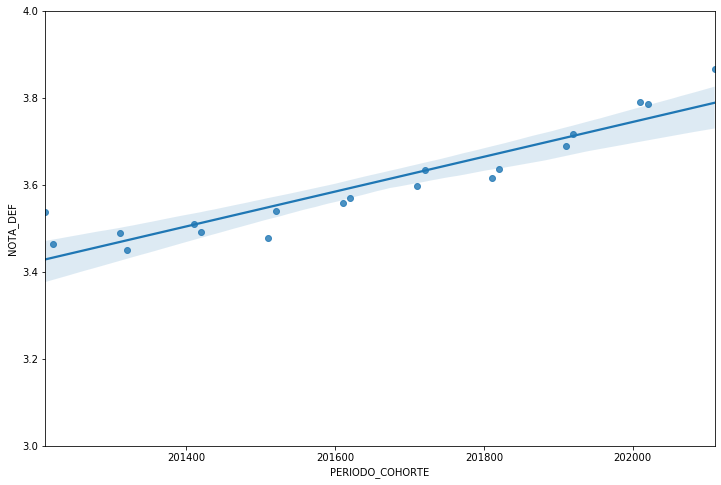

In [9]:
fig, axes = plt.subplots(figsize=(12,8))
sns.color_palette('Paired')
sns.regplot(x = 'PERIODO_COHORTE', y = 'NOTA_DEF', data = grouped_by_period)
plt.ylim(3,4)
plt.xticks(rotation=0)

In [26]:
grouped_by_materia = student_performance_new.groupby('NOMBRE_MAT')[['NOTA_DEF']].mean().reset_index()
grouped_by_materia.head()

,NOMBRE_MAT,NOTA_DEF
0,ACT.PROC.TECNOLOG,3.821368
1,ACUEDUCTO,4.020000
2,ACUERDOS.TRATADOS,4.008696
3,ADM.REC.HUMANO,3.734722
4,ADMINIST.MERCADEO,4.000893


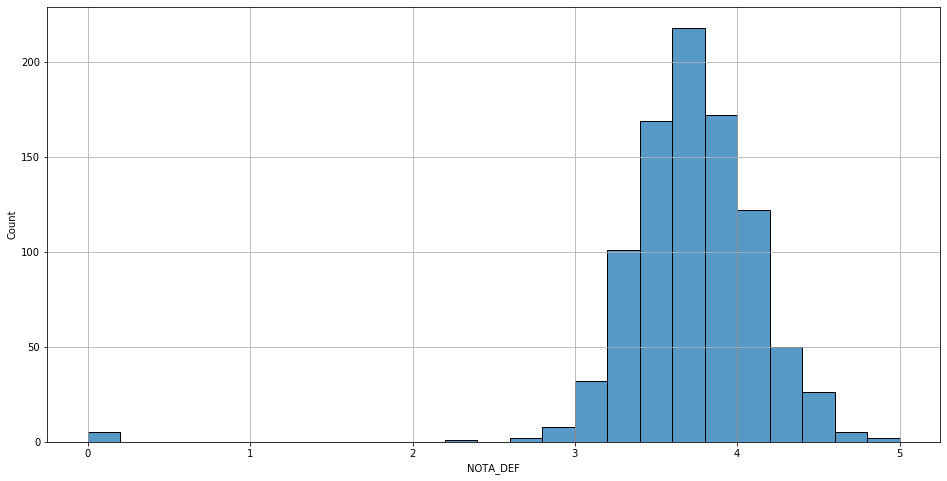

In [38]:
fig, axes = plt.subplots(figsize=(16,8))
#sns.color_palette('Dark')
sns.histplot(x = 'NOTA_DEF', data = grouped_by_materia, bins=25)
plt.grid(True)

In [44]:
len_periodos = len(student_performance_new.PERIODO_COHORTE.value_counts())
periodos = list(student_performance_new.PERIODO_COHORTE.unique())

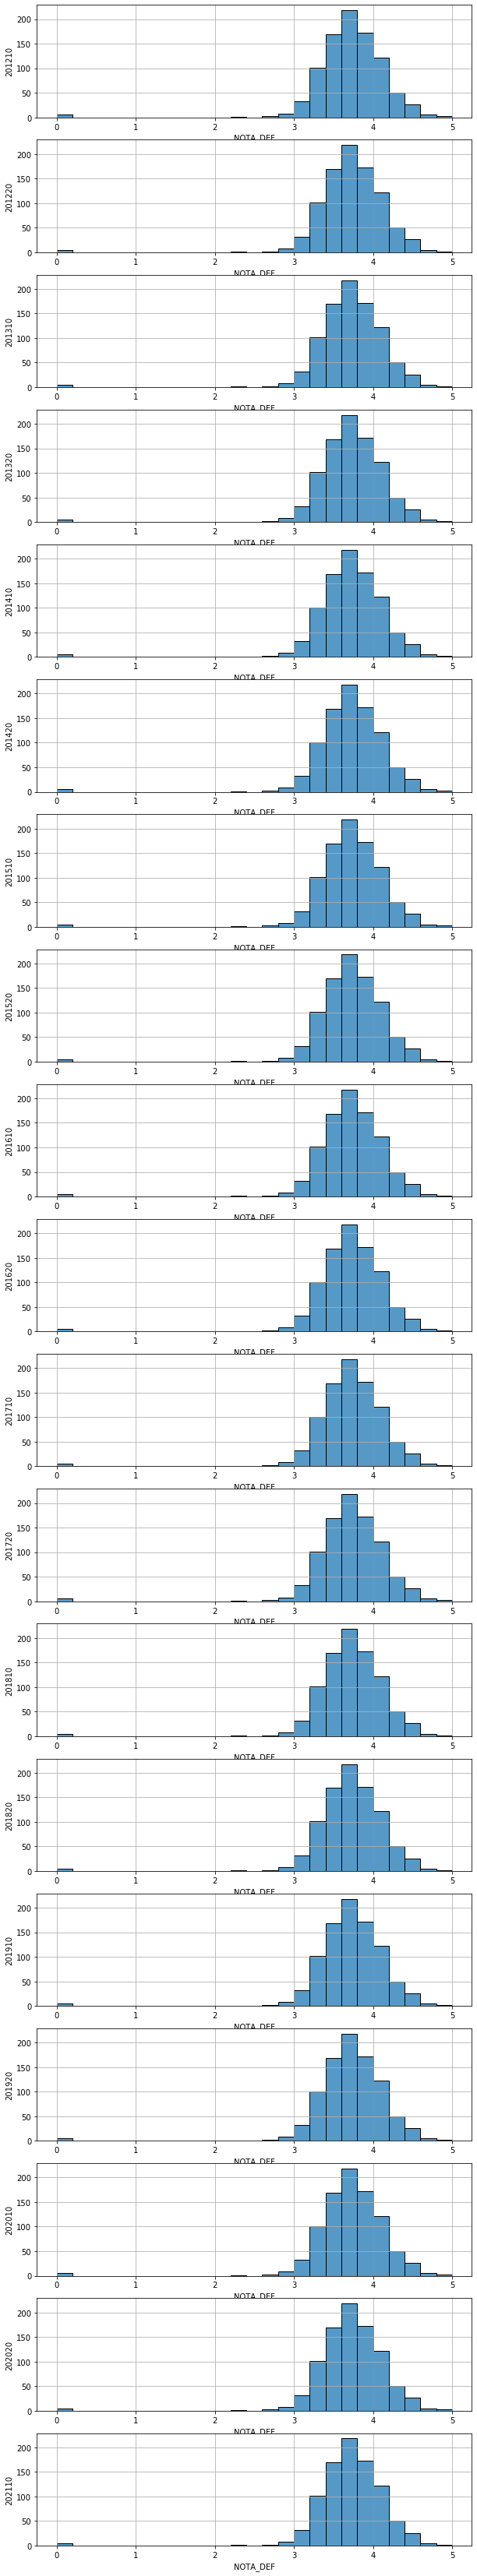

In [51]:
fig, axes = plt.subplots(len_periodos, 1, figsize=(10,60))
plt.grid(True)
for idx, periodo in zip(range(0, len_periodos),periodos):
    df_periodo = student_performance_new[student_performance_new['PERIODO_COHORTE'] == periodo]
    grouped_by_materia_periodo = df_periodo.groupby('NOMBRE_MAT')[['NOTA_DEF']].mean().reset_index()
    sns.histplot(x = 'NOTA_DEF', data = grouped_by_materia, bins=25, ax = axes[idx])
    axes[idx].set_ylabel(periodo)
    axes[idx].grid(True)